<a href="https://colab.research.google.com/github/Samtomsa/DSF/blob/main/04_Dataframes_Stats_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 Plotting and Descriptive Statistics on Dataframes

# Minimal plotting

First we give a very minimalistic introduction to plotting which allows you to create line or scatter plots as well as histograms. For this we introduce here the Matplotlib library, which is the oldest and still one of the most widely used plotting library.

We start by importing it. Almost all the most important functions are located in a submodule called ```pyplot``` which is almost systemaically abbreviated into ```plt```:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Dataset

We start by creating a simple dataset. As an exercise we do this by using Numpy functions. First we generate an x-axis:

In [ ]:
x_val = np.arange(0, 10, 0.1)

Then we create a new array that is just the cosine of ```x_val```:

In [ ]:
y_val = np.cos(x_val)

## Line plot

Those two arrays are all we need to create the simplest possible plot of a function ```y_val = cos(x_val)```. The first thing that we have to do is to **create a figure object and an axis object** with Matplotlib. The figure object can contain many elements (imagine for example a grid of plots), while the axis object contains a specific plot. We can get a figure and and an axis using the ```subplots()``` function:

In [ ]:
fig, ax = plt.subplots()

As you see above this produces a blank figure that we need to fill. As all the variables that we have seen until now (Numpy arrays, Pandas dataframe) the ```fig``` and ```ax``` objects have specific functions attached to them. ```ax``` in particular has all the plotting functions attached to it. In particular the simple ```plot()``` function, which takes two arguments: x values and y values: 

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val);

That's it, we have our plot! We can easily add more data to it by just calling more times the ```ax.plot``` function. For example we can generate a new y signal for the sine:

In [ ]:
y_val2 = np.sin(x_val)

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val);
ax.plot(x_val, y_val2);

We will see later how to adjust everything on this plot from colors to labels etc. The only additional point we show here is how to show every datapoint with a marker such as a circle using an additional parameter representing the line/marker type:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_val, y_val,'o');
ax.plot(x_val, y_val2,'-x');

## Histogram

The other type of plot that is very useful, in particular when dealing with statistics, is the histogram. The principle of figure creation is the same. Except that now we use the ```ax.hist()``` commmand which takes only one argument, the values that we want to turn into a histogram:

In [ ]:
fig, ax = plt.subplots()
ax.hist(y_val);

Again, we will see how to specify more options for this plot. At the moment we only show that we can specify the position of the bins that we want to use for binning. This can be useful if the default bin size is not satisfactory. We can simply use the ```bins``` arguments and pass an array of positions:

In [ ]:
fig, ax = plt.subplots()
ax.hist(y_val, bins=np.arange(-1,1.5,0.5));

## Exercise 4,1

1. Using Pandas, import the CSV file located at https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv
2. Display the first 3 lines using the ```head()``` function.
3. Rembering that you can extract a given column from the table using ```my_dataframe['column_name']```, try to plot the ```bill_depth_mm```as as function of ```bill_length_mm``` using the ```plot``` function. Does it work ? Did you pass a Numpy array to the plotting function ?
4. Change the line/marker type so that you obtain a scatter plot, i.e. only single dots without a line

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

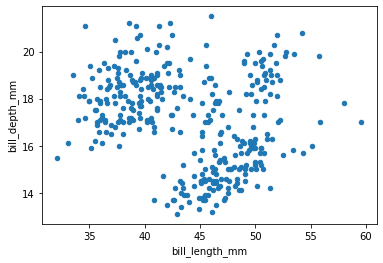

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')  #1
df.head(3)                                                                                                          #2
df.plot('bill_length_mm','bill_depth_mm',kind = "scatter")                                                          #3.5 4

# Plotting on Dataframes

Humans are very bad at reading large datasets, i.e. tables. Therefore, we have algorithms creating descriptive statistics for us. These are either summary numbers or plots, i.e. vizualisations. 

Pandas Dataframes have many [plotting](https://pandas.pydata.org/docs/reference/frame.html#plotting) methods. We practise some very useful ones here. The rest you can look up via the link.

In [26]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/P3HT_Abs_data_Teaching.txt' #Data-CCD/4ms_10 av_30 s_Absorbance_10-32-04-868.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the MCR data into a dataframe
import pandas as pd
df = pd.read_csv(path, delimiter='\t',header=0)
df.info()

In [ ]:
df.head()

Histograms, or frequency plots, are much used as they show the probability density function pdf (continous data) of the data sample in a column. When dat a is discrete, it is called the probability mass function pmf. The pdf is the model of the data and the basis of all statistics.   

In [ ]:
# Histograms of all the columns
#df.plot.his()

In [ ]:
# Histogram of selected columns
df.hist(df.columns[2], bins=20)

Box plots are useful for showing differences between groups of data. For example, we may be interested in the difference in the distributions between wavelengths.

In [ ]:
df.boxplot([df.columns[2], df.columns[3], df.columns[4]])

In [ ]:
# Alternatively we can look at the histograms directly
import matplotlib.pyplot as plt
plt.figure()
ax = df.hist(df.columns[2], bins=20)
df.hist(df.columns[3], bins=20, ax=ax)
df.hist(df.columns[4], bins=20, ax=ax)
plt.xlabel('What is this axis ?')
plt.ylabel('Frequency')
plt.show()

Very often one is also interested correlations between columns (features) of the data. The visualisation of correlations is done with scatter plots. Here is the simplest one.

In [ ]:
#df.plot.scatter(df[df.columns[2]],df[df.columns[3]])
df.plot.scatter(2,3)

You may take a short look at the other plotting methods on dataframes [here](https://pandas.pydata.org/docs/reference/frame.html#plotting).

# Descriptive Statistics on Dataframes

Pandas Dataframes have several
[descriptive statistics](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats) methods. Most of the are calculations based the so-called moments of the pdf (mean, variance, standard deviation, skew, kurtosis, minimum value, maximum value, quantiles, p-value ...)

We practise some very useful ones. The rest you can look up in the API documentation via the link. 

In [ ]:
round(df.describe(),2) # why do we use the round method ?

In [ ]:
# Try some other descriptive methods here.


# Exercise 4.2

We return to the CCD dataset. Show the boxplots of ten wavelengths, roughly equidistant between the minumum and maximum wavelength in the dataset. 

Now fill this [form](https://docs.google.com/forms/d/e/1FAIpQLSd5QH237yJ2PizRG1Of8mV9zDzcJLH6nmEI2KqVX1cWINi9Fg/viewform?usp=sf_link), needed for getting participation assignment points